# Setup

Clone repo, install dependencies and check PyTorch and GPU.

In [ ]:
# !git clone https://github.com/ultralytics/yolov5  # clone
# %cd yolov5
from google.colab import drive
drive.mount('/content/drive')
 
import os 
os.chdir('/content/drive/MyDrive/yolov5')
%pip install -qr requirements.txt  # install
!git pull 
import torch
import utils
display = utils.notebook_init()  # checks


YOLOv5 🚀 v6.1-207-g5774a15 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.7/78.2 GB disk)


# Testing model on randome 10 images. 

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /content/drive/.shortcut-targets-by-id/1UMUwxD61ppekPvcllynqwipTo8_8i-BU/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v6.1-207-g5774a15 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7042489 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


[tensor([[0.04057, 0.32197, 0.46435, 0.84411, 0.83006, 8.00000],
        [0.48689, 0.27677, 0.82744, 0.62742, 0.55037, 8.00000]], device='cuda:0')]



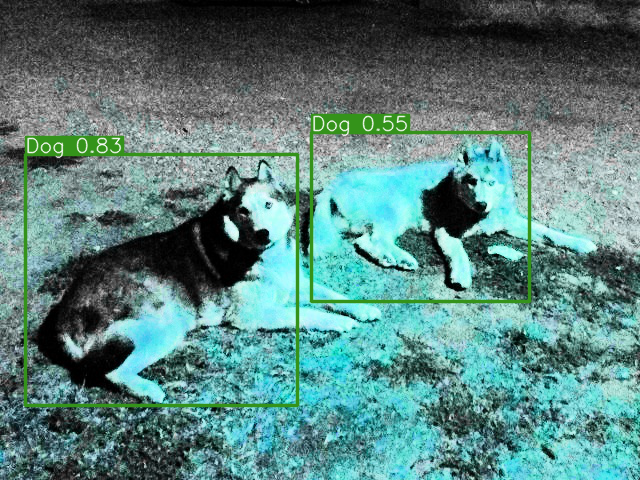

[tensor([[0.08701, 0.22497, 0.95401, 0.89974, 0.44945, 8.00000]], device='cuda:0')]



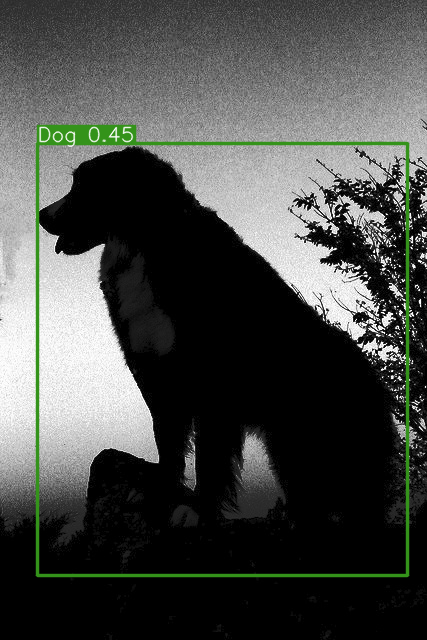

[tensor([[ 0.11799,  0.79076,  0.37933,  0.95181,  0.91009,  8.00000],
        [ 0.05183,  0.38599,  0.25940,  0.77054,  0.89639, 10.00000],
        [ 0.19553,  0.38845,  0.31628,  0.64542,  0.88209, 10.00000],
        [ 0.57101,  0.16612,  0.99524,  0.99492,  0.86346, 10.00000],
        [ 0.00000,  0.36686,  0.11863,  0.75824,  0.84437, 10.00000],
        [ 0.46218,  0.44366,  0.56595,  0.58723,  0.84114, 10.00000],
        [ 0.38264,  0.51223,  0.71164,  0.96953,  0.74595, 10.00000]], device='cuda:0')]



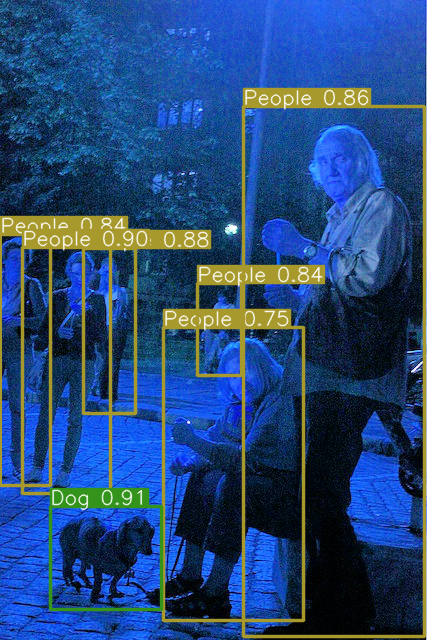

[tensor([[0.39103, 0.13718, 0.93292, 0.96930, 0.76379, 8.00000],
        [0.20595, 0.21577, 0.51218, 0.83631, 0.68340, 8.00000]], device='cuda:0')]



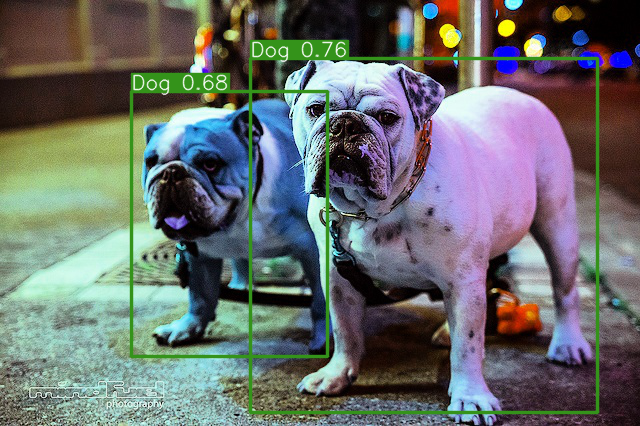

[tensor([[ 0.24586,  0.54428,  0.54544,  0.99963,  0.91397, 10.00000]], device='cuda:0')]



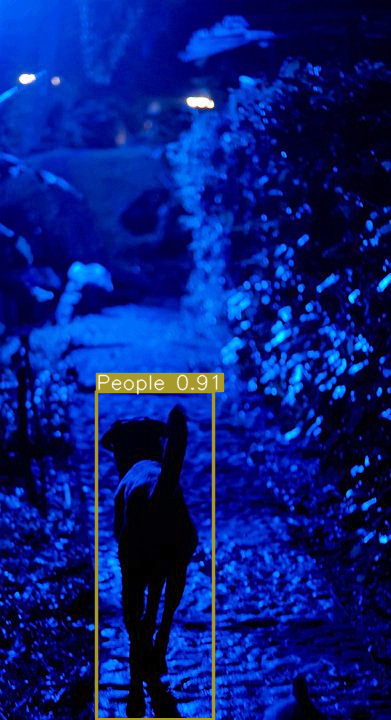

In [ ]:
model =torch.hub.load('ultralytics/yolov5','custom',path='/content/drive/MyDrive/yolov5/runs/train/exp13/weights/best.pt',force_reload=True)
import numpy as np


model.conf = 0.30  # confidence threshold (0-1)
model.iou = 0.30  # NMS IoU threshold (0-1)
import cv2
from google.colab.patches import cv2_imshow
import glob
imglist = glob.glob('/content/drive/MyDrive/Images/*')
for img in imglist[15 : 20] :
  e=model(img,size=640)
  print(e.xyxyn)
  print()
  img=cv2.imread(img)
  cv2_imshow(np.squeeze(e.render()))



# Creating lable for kaggel


In [ ]:
import os
import torch
import glob
import pandas as pd

model =torch.hub.load('ultralytics/yolov5','custom',path='/content/drive/MyDrive/yolov5/runs/train/exp13/weights/best.pt',force_reload=True)
# model.conf = 0.80  # confidence threshold (0-1)
# model.iou = 0.60  # NMS IoU threshold (0-1)
os.chdir('/content/drive/MyDrive/Images')


model.conf = 0.40  # confidence threshold (0-1)
model.iou = 0.40  # NMS IoU threshold (0-1)

paths = glob.glob('*')

line='ImageName,nBicycle,nBoat,nBottle,nBus,nCar,nCat,nChair,nCup,nDog,nMotorbike,nPeople,nTable\n'

for i in paths:

  nBicycle=0
  nBoat=0
  nBottle=0
  nBus=0
  nCar=0
  nCat=0
  nChair=0
  nCup=0
  nDog=0
  nMotorbike=0
  nPeople=0
  nTable=0
  res = model(i)
  lenClass = len(res.pandas().xyxy[0]['class'].value_counts())
  
  
  for h in range(lenClass):
    cur = res.pandas().xyxy[0]['class'].value_counts().index[h]   
    if res.pandas().xyxy[0]['class'].value_counts().index[h]==0:
      nBicycle+=res.pandas().xyxy[0]['class'].value_counts()[cur]
    elif res.pandas().xyxy[0]['class'].value_counts().index[h]==1:
      nBoat+=res.pandas().xyxy[0]['class'].value_counts()[cur]
    elif res.pandas().xyxy[0]['class'].value_counts().index[h]==2:
      nBottle+=res.pandas().xyxy[0]['class'].value_counts()[cur]
    elif res.pandas().xyxy[0]['class'].value_counts().index[h]==3:
      nBus+=res.pandas().xyxy[0]['class'].value_counts()[cur]
    elif res.pandas().xyxy[0]['class'].value_counts().index[h]==4:
      nCar+=res.pandas().xyxy[0]['class'].value_counts()[cur]
    elif res.pandas().xyxy[0]['class'].value_counts().index[h]==5:
      nCat+=res.pandas().xyxy[0]['class'].value_counts()[cur]
    elif res.pandas().xyxy[0]['class'].value_counts().index[h]==6:
      nChair+=res.pandas().xyxy[0]['class'].value_counts()[cur]
    elif res.pandas().xyxy[0]['class'].value_counts().index[h]==7:
      nCup+=res.pandas().xyxy[0]['class'].value_counts()[cur]
    elif res.pandas().xyxy[0]['class'].value_counts().index[h]==8:
      nDog+=res.pandas().xyxy[0]['class'].value_counts()[cur]
    elif res.pandas().xyxy[0]['class'].value_counts().index[h]==9:
      nMotorbike+=res.pandas().xyxy[0]['class'].value_counts()[cur]
    elif res.pandas().xyxy[0]['class'].value_counts().index[h]==10:
      nPeople+=res.pandas().xyxy[0]['class'].value_counts()[cur]
    elif res.pandas().xyxy[0]['class'].value_counts().index[h]==11:
      nTable+=res.pandas().xyxy[0]['class'].value_counts()[cur]
  line += i +',' +str(nBicycle)+','+str(nBoat)+','+str(nBottle)+','+str(nBus)+','+str(nCar)+','+str(nCat)+','+str(nChair)+','+str(nCup)+','+str(nDog)+','+str(nMotorbike)+','+str(nPeople)+','+str(nTable)+'\n'


text_file = open("/content/drive/MyDrive/Mico40_iou_40.txt", "w")
#Opens or creates the .txt file, sharing the directory of the script#
text_file.write(line)
#Writes the variable into the .txt file#
text_file.close()


read_file = pd.read_csv (r'/content/drive/MyDrive/Mico40_iou_40.txt')
read_file.to_csv (r'/content/drive/MyDrive/Mico40_iou_40.csv', index=None)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /content/drive/MyDrive/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v6.1-207-g5774a15 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7042489 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [ ]:

!python train.py --img 640 --batch 16 --epochs 40 --data coco128.yaml --weights /content/drive/MyDrive/yolov5/runs/train/exp17/weights/best.pt --cache

wandb: Currently logged in as: snn. Use `wandb login --relogin` to force relogin
train: weights=/content/drive/MyDrive/yolov5/runs/train/exp17/weights/best.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=40, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 7 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.1-207-g5774a15 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005,

In [ ]:
from utils.plots import plot_results 
plot_results('/content/drive/MyDrive/yolov5/runs/train/exp2/results.csv')  # plot 'results.csv' as 'results.png'

# detection 

In [ ]:
import os 
os.chdir('/content/drive/MyDrive/yolov5')
!python detect.py --source /content/drive/MyDrive/Images/ --weights /content/drive/MyDrive/yolov5/runs/train/exp13/weights/best.pt --conf 0.25 --name yolo_project --save-txt  

In [ ]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images
display.Image(filename='runs/detect/exp/zidane.jpg', width=600)

detect: weights=['yolov5s.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-174-gc4cb7c6 torch 1.11.0+cu113 CUDA:0 (Tesla V100-SXM2-16GB, 16160MiB)

100% 14.1M/14.1M [00:00<00:00, 220MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, Done. (0.012s)
image 2/2 /content/yolov5/data/images/zidane.jpg: 384x640 2 persons, 2 ties, Done. (0.013s)
Speed: 0.5ms pre-process, 12.5ms inference, 17.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


In [ ]:
# Weights & Biases  (optional)
%pip install -q wandb
import wandb
wandb.login()

     |████████████████████████████████| 1.8 MB 32.1 MB/s 
     |████████████████████████████████| 145 kB 75.6 MB/s 
     |████████████████████████████████| 181 kB 71.2 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 


<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True